# Compare Surface Roughness

## Import Library

In [79]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import cv2
import io
import base64 
import glob
import os
from scipy import signal
import numpy as np
import matplotlib.image as img
from PIL import Image

## Load Image

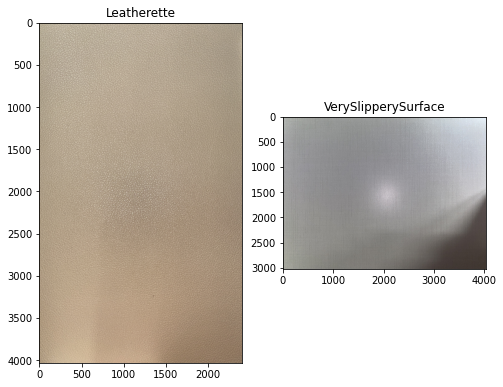

In [80]:
cwd = os.getcwd()
Leatherette_imgPath = cwd+'/DataImage/Leatherette.jpg'
VerySlipperySurface_imgPath = cwd+'/DataImage/VerySlipperySurface.JPG'

Leatherette_Img = img.imread(Leatherette_imgPath)
VerySlipperySurface_Img = img.imread(VerySlipperySurface_imgPath)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Leatherette')
plt.imshow(Leatherette_Img)

plt.subplot(1,2,2)
plt.title('VerySlipperySurface')
plt.imshow(VerySlipperySurface_Img)

plt.show()

## Convert to GrayScale using HSI

In [81]:
def draw_convert_RGB2GRAY(Img):
    
    Gray_Img = np.zeros((Img.shape[0],Img.shape[1]))
    print(Gray_Img.shape)
    Gray_Img = Img[:,:,0]/3 + Img[:,:,1]/3 + Img[:,:,2]/3
    Gray_Img = Gray_Img/255
    
    return Gray_Img
    
    

(4032, 2406)
(3024, 4032)


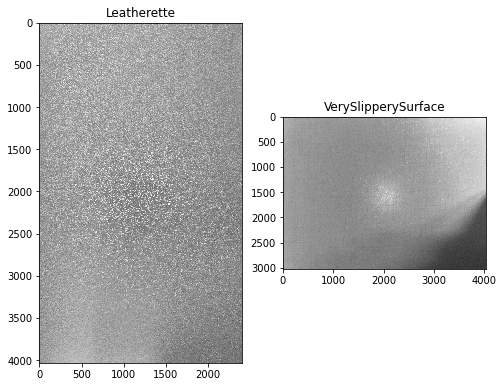

In [82]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.title('Leatherette')
Gray_Leatherette = draw_convert_RGB2GRAY(Leatherette_Img)
plt.imshow(Gray_Leatherette, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(1,2,2)
plt.title('VerySlipperySurface')
Gray_VerySlipperySurface = draw_convert_RGB2GRAY(VerySlipperySurface_Img)
plt.imshow(Gray_VerySlipperySurface, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.show()

## Center of Image's Surface

In [83]:
def draw_surface(title,grayscaledImg, tile_size, set_zlim ,view_Vertical, view_Horizontal):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')

    cutted_width = grayscaledImg.shape[1]//2
    cutted_height = grayscaledImg.shape[0]//2
    center = (cutted_height, cutted_width)
    
    Z = grayscaledImg[center[0]-tile_size:center[0]+tile_size,center[1]-tile_size:center[1]+tile_size]*100

    x = np.linspace(0,Z.shape[1],Z.shape[1])
    y = np.linspace(0,Z.shape[0],Z.shape[0])
    X, Y = np.meshgrid(x,y)


    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf, shrink=0.6, aspect=15)
    ax.set_zlim(set_zlim)

    # vertical, horizontal
    ax.view_init(view_Vertical, view_Horizontal)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.title(title)
    plt.tight_layout()
    

## Draw Data Image's Surface

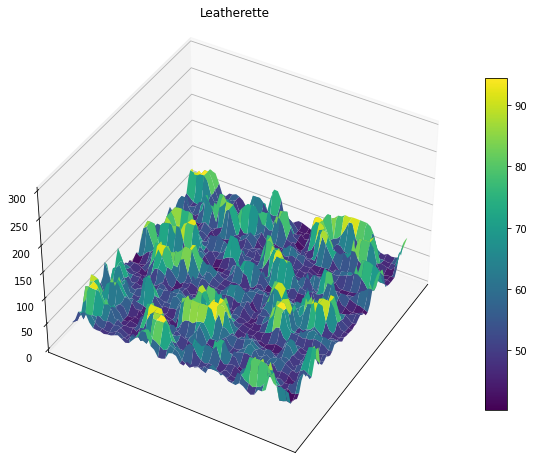

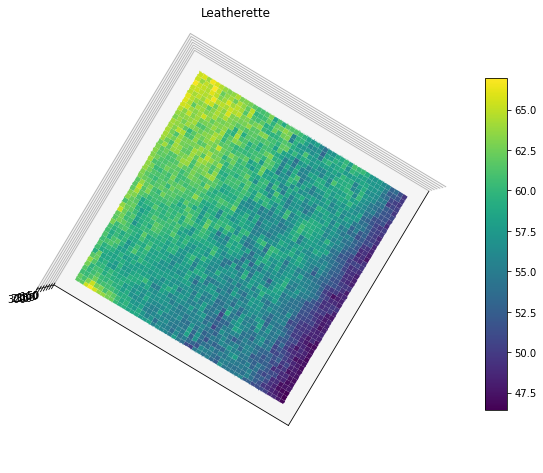

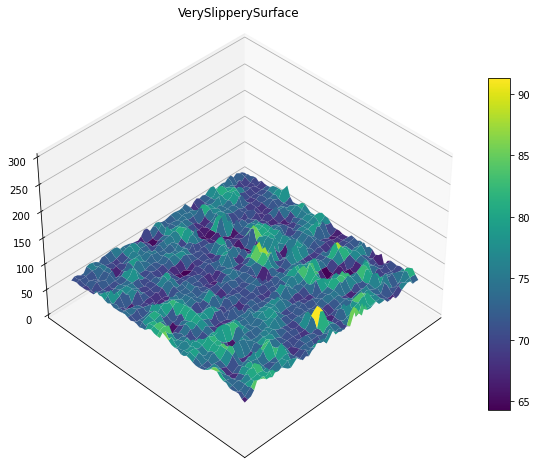

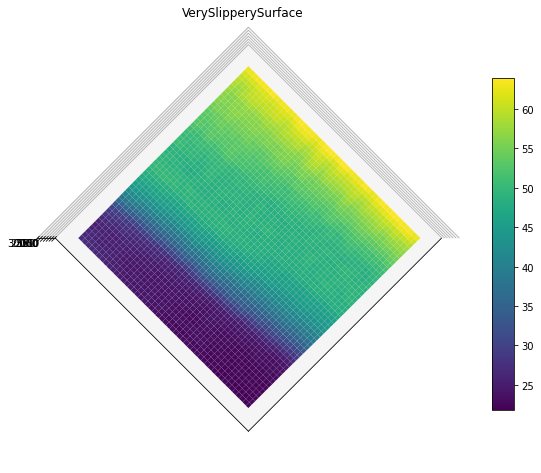

In [84]:
draw_surface('Leatherette',Gray_Leatherette,30,(0,300), 40, 30)
draw_surface('Leatherette',Gray_Leatherette,2000,(0,300), 90, 30)
draw_surface('VerySlipperySurface',Gray_VerySlipperySurface,30,(0,300), 40, 45)
draw_surface('VerySlipperySurface',Gray_VerySlipperySurface,2000,(0,300), 90, 45)


## Extract One Row of Data Image

In [85]:
def extract_one_rowOf_DataImage(title, grayscaledImg):
    plt.figure(figsize=(8,8))
    
    center_row = grayscaledImg.shape[0]//2
    extract_center_row = grayscaledImg[:,center_row]
    
    sorted = np.sort(extract_center_row)
    
    print('----------------------------------------')
    print(title)
    print('min --> ',sorted[0])
    print('max --> ',sorted[-1])
    print('----------------------------------------')
    
    plt.plot(extract_center_row, '-', color='black')
    plt.ylim(0,1)
    plt.title(title)
    plt.show
    
    return extract_center_row

----------------------------------------
Leatherette
min -->  0.36601307189542487
max -->  0.9477124183006534
----------------------------------------


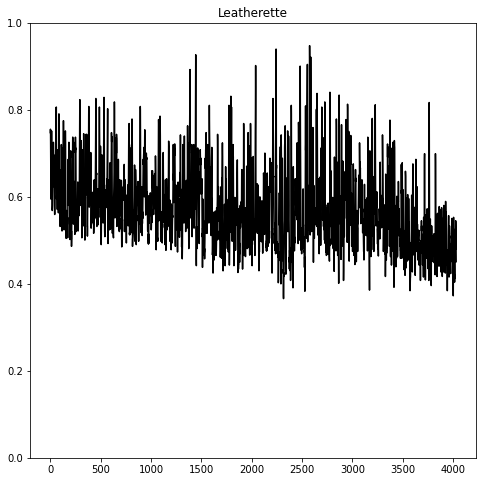

In [86]:
extract_Leatherette = extract_one_rowOf_DataImage('Leatherette',Gray_Leatherette)

----------------------------------------
VerySlipperySurface
min -->  0.4209150326797386
max -->  0.6666666666666666
----------------------------------------


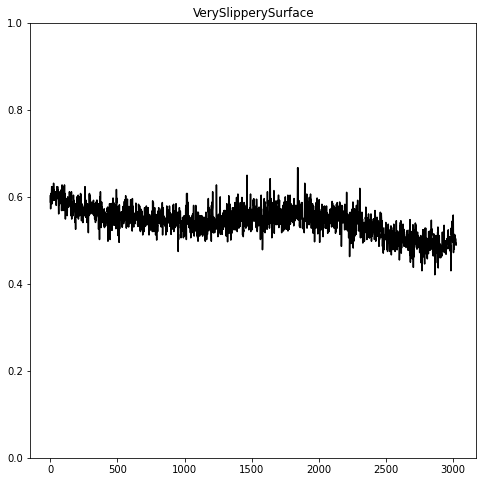

In [87]:
extract_VerySlipperySurface = extract_one_rowOf_DataImage('VerySlipperySurface',Gray_VerySlipperySurface)

## Pass through High & Low Frequency Pass Filter

### Define High & Low Frequency Pass Filter

In [88]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype = "high", analog = False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b,a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [89]:
def draw_frequency(type,title,filtered_frequency):
    plt.figure(figsize=(8,8))
    
    sorted = np.sort(filtered_frequency)
    print('----------------------------------------')
    print(title)
    print('min --> ',sorted[0])
    print('max --> ',sorted[-1])
    print('----------------------------------------')
    
    plt.plot(filtered_frequency, '-', color='black')
    if type == 'low':
        plt.ylim(0,1)
    else:
        plt.ylim(-0.6,0.6)
    plt.title(title)
    plt.show

----------------------------------------
Leatherette
min -->  0.36601307189542487
max -->  0.9477124183006534
----------------------------------------


array([0.74771242, 0.75555556, 0.74379085, ..., 0.49019608, 0.46666667,
       0.45098039])

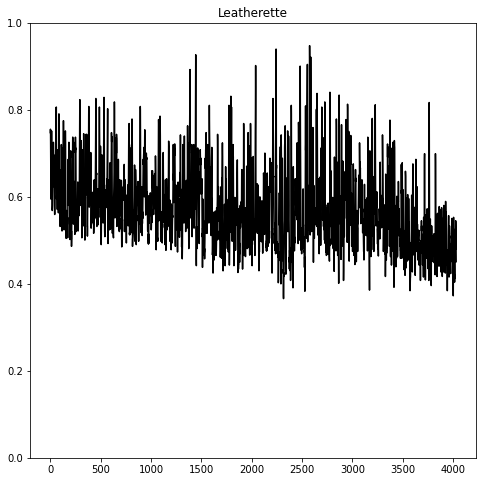

In [90]:
extract_one_rowOf_DataImage('Leatherette',Gray_Leatherette)

----------------------------------------
HPF_Leatherette
min -->  -0.19018662762470498
max -->  0.3639017456887085
----------------------------------------
----------------------------------------
LPF_Leatherette
min -->  0.47311883449379627
max -->  0.758611211751058
----------------------------------------


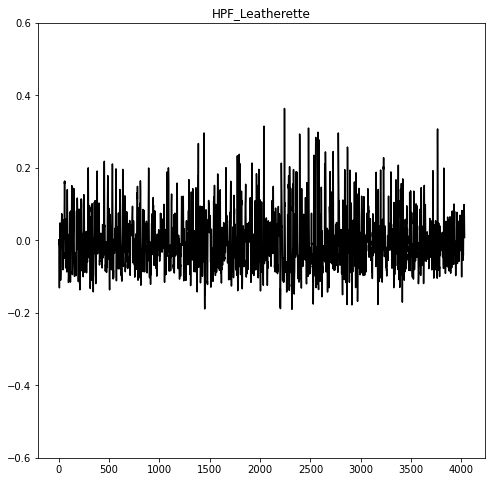

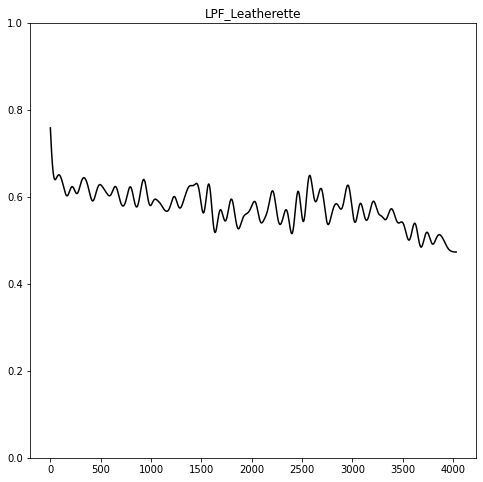

In [91]:
HPF_Leatherette = butter_highpass_filter(extract_Leatherette,1,100)
draw_frequency('high','HPF_Leatherette',filtered_frequency=HPF_Leatherette)
LPF_Leatherette = butter_lowpass_filter(extract_Leatherette,1,100)
draw_frequency('low','LPF_Leatherette',filtered_frequency=LPF_Leatherette)

----------------------------------------
VerySlipperySurface
min -->  0.4209150326797386
max -->  0.6666666666666666
----------------------------------------


array([0.58823529, 0.60392157, 0.57254902, ..., 0.49281046, 0.48888889,
       0.49281046])

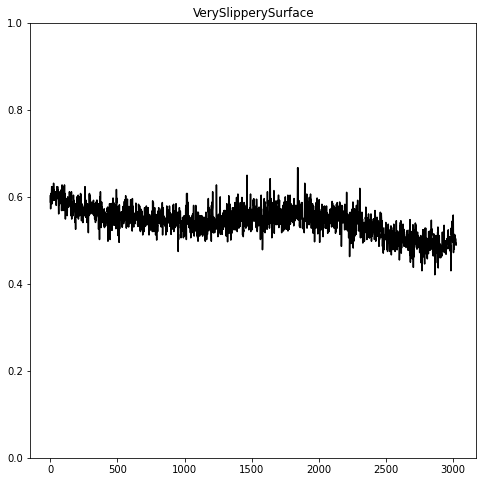

In [92]:
extract_one_rowOf_DataImage('VerySlipperySurface',Gray_VerySlipperySurface)

----------------------------------------
HPF_VerySlipperySurface
min -->  -0.07527892301377809
max -->  0.09669009192873654
----------------------------------------
----------------------------------------
LPF_VerySlipperySurface
min -->  0.4810045475887259
max -->  0.6050206258253904
----------------------------------------


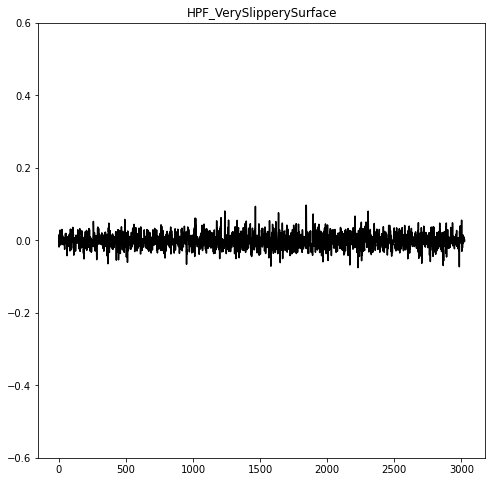

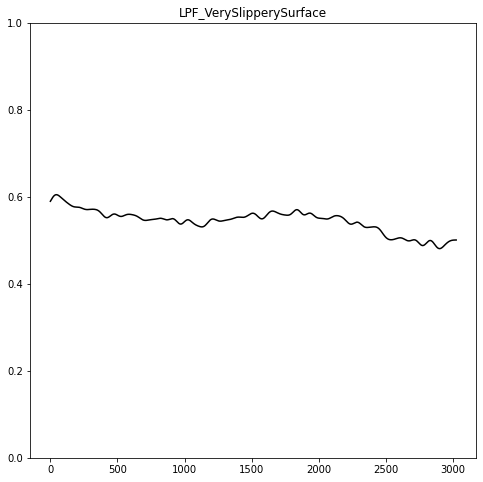

In [93]:
HPF_VerySlipperySurface = butter_highpass_filter(extract_VerySlipperySurface,1,100)
draw_frequency('high','HPF_VerySlipperySurface',filtered_frequency=HPF_VerySlipperySurface)
LPF_VerySlipperySurface = butter_lowpass_filter(extract_VerySlipperySurface,1,100)
draw_frequency('low','LPF_VerySlipperySurface',filtered_frequency=LPF_VerySlipperySurface)


## Evaluate Surface Roughness

### Ra : Arithmetical Average Roughness

In [94]:
def compute_Ra(r_profile):
    
    abs_rProfile = np.absolute(r_profile)
    sum_rProfile = np.sum(abs_rProfile)
    
    return sum_rProfile / len(r_profile)

In [95]:
print('HPF_Leatherette --> ',compute_Ra(HPF_Leatherette))
print('HPF_VerySlipperySurface --> ',compute_Ra(HPF_VerySlipperySurface))

HPF_Leatherette -->  0.0576127637568281
HPF_VerySlipperySurface -->  0.014743648327098131


### Rz1max : Maximum Height Roughness

In [96]:
def compute_Rz1max(r_profile):
    
    sorted = np.sort(r_profile)
    min_profile = abs(sorted[0])
    max_profile = sorted[-1]
    
    return min_profile + max_profile

In [97]:
print('HPF_Leatherette --> ',compute_Rz1max(HPF_Leatherette))
print('HPF_VerySlipperySurface --> ',compute_Rz1max(HPF_VerySlipperySurface))

HPF_Leatherette -->  0.5540883733134134
HPF_VerySlipperySurface -->  0.17196901494251463


### Rz : Ten Point Heignt

In [98]:
def compute_Rz(r_profile):
    
    eval_length = len(r_profile)
    top_5 = []
    bottom_5 = []
    
    for i in range(5):
        sorted_arr = np.sort(r_profile[i*eval_length//5:(i+1)*eval_length//5],axis=None)
        max = sorted_arr[-1]
        min = sorted_arr[0]
        top_5.append(max)
        bottom_5.append(min)
        
    bottom_5 = np.absolute(bottom_5)
    Rz = (np.sum(top_5) + np.sum(bottom_5)) / 5
    
    return Rz

In [99]:
print('HPF_Leatherette --> ',compute_Rz(HPF_Leatherette))
print('HPF_VerySlipperySurface --> ',compute_Rz(HPF_VerySlipperySurface))

HPF_Leatherette -->  0.4731183721108215
HPF_VerySlipperySurface -->  0.14289036162729


---

---

# Analyze Crushed Brick Surface Image

## Load Image

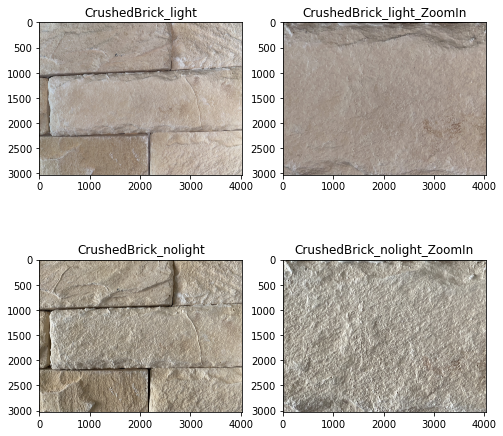

In [100]:
cwd = os.getcwd()
CrushedBrick_light_Path = cwd+'/DataImage/CrushedBrick_light.JPG'
CrushedBrick_light_ZoomIn_Path = cwd+'/DataImage/CrushedBrick_light_ZoomIn.JPG'
CrushedBrick_nolight_Path = cwd+'/DataImage/CrushedBrick_nolight.JPG'
CrushedBrick_nolight_ZoomIn_Path = cwd+'/DataImage/CrushedBrick_nolight_ZoomIn.JPG'

CrushedBrick_light_Img = img.imread(CrushedBrick_light_Path)
CrushedBrick_light_ZoomIn_Img = img.imread(CrushedBrick_light_ZoomIn_Path)
CrushedBrick_nolight_Img = img.imread(CrushedBrick_nolight_Path)
CrushedBrick_nolight_ZoomIn_Img = img.imread(CrushedBrick_nolight_ZoomIn_Path)

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.title('CrushedBrick_light')
plt.imshow(CrushedBrick_light_Img)

plt.subplot(2,2,2)
plt.title('CrushedBrick_light_ZoomIn')
plt.imshow(CrushedBrick_light_ZoomIn_Img)

plt.subplot(2,2,3)
plt.title('CrushedBrick_nolight')
plt.imshow(CrushedBrick_nolight_Img)

plt.subplot(2,2,4)
plt.title('CrushedBrick_nolight_ZoomIn')
plt.imshow(CrushedBrick_nolight_ZoomIn_Img)

plt.show()

## Convert to GrayScale using HSI

(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)


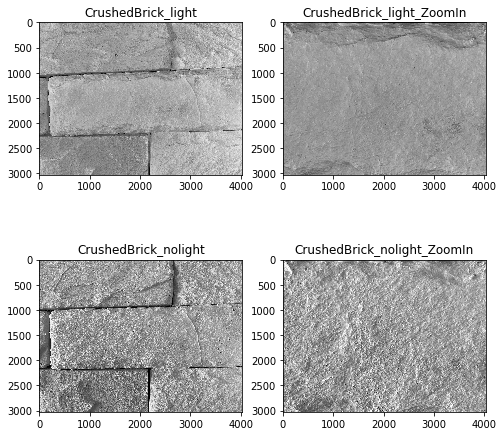

In [101]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.title('CrushedBrick_light')
Gray_CrushedBrick_light = draw_convert_RGB2GRAY(CrushedBrick_light_Img)
plt.imshow(Gray_CrushedBrick_light, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(2,2,2)
plt.title('CrushedBrick_light_ZoomIn')
Gray_CrushedBrick_light_ZoomIn = draw_convert_RGB2GRAY(CrushedBrick_light_ZoomIn_Img)
plt.imshow(Gray_CrushedBrick_light_ZoomIn, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(2,2,3)
plt.title('CrushedBrick_nolight')
Gray_CrushedBrick_nolight = draw_convert_RGB2GRAY(CrushedBrick_nolight_Img)
plt.imshow(Gray_CrushedBrick_nolight, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(2,2,4)
plt.title('CrushedBrick_nolight_ZoomIn')
Gray_CrushedBrick_nolight_ZoomIn = draw_convert_RGB2GRAY(CrushedBrick_nolight_ZoomIn_Img)
plt.imshow(Gray_CrushedBrick_nolight_ZoomIn, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.show()

## Draw Center of Image's Surface

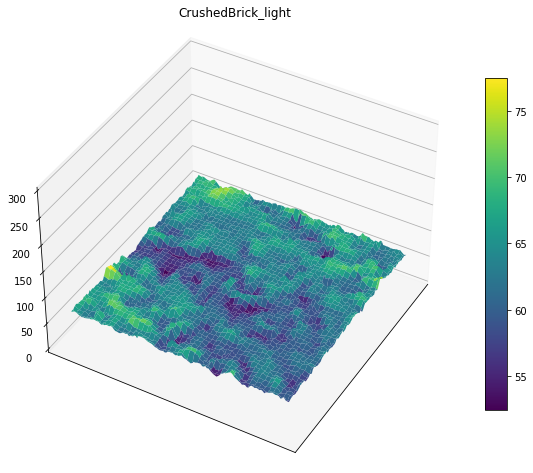

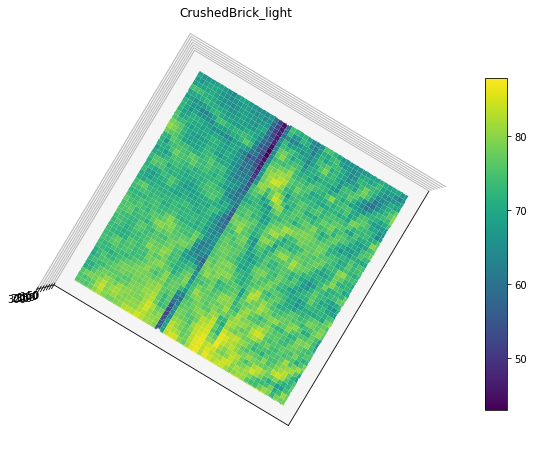

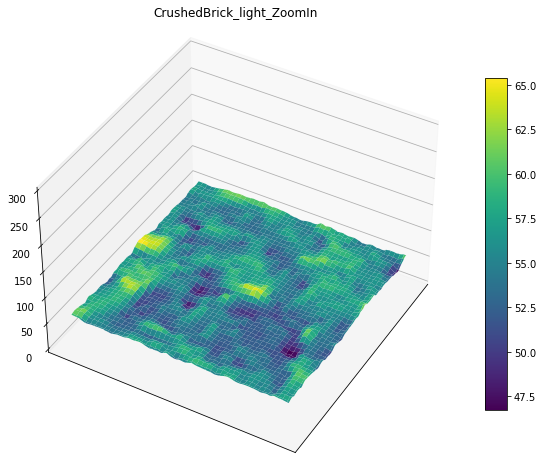

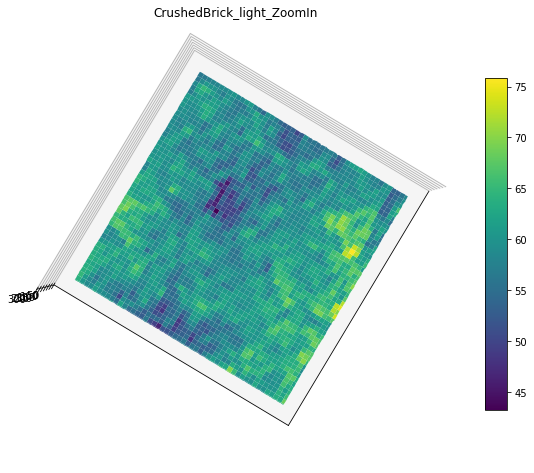

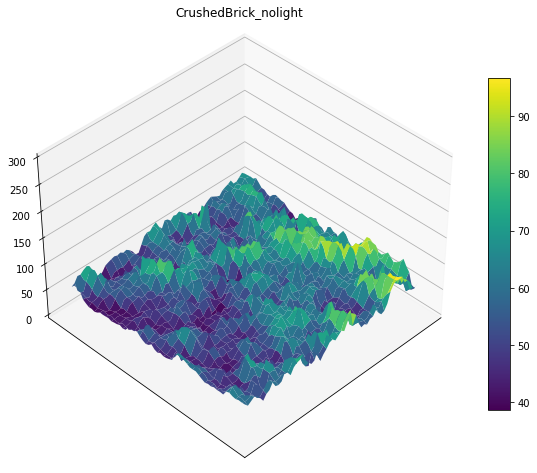

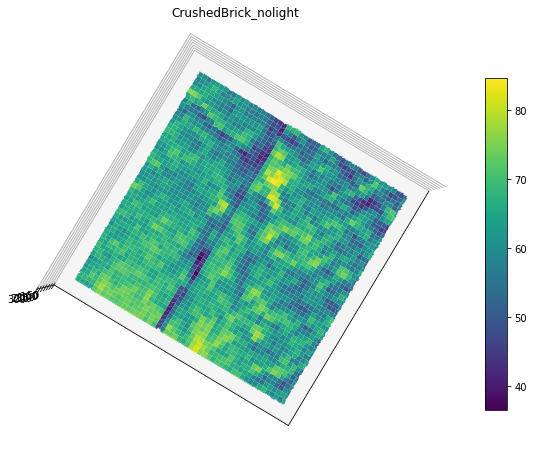

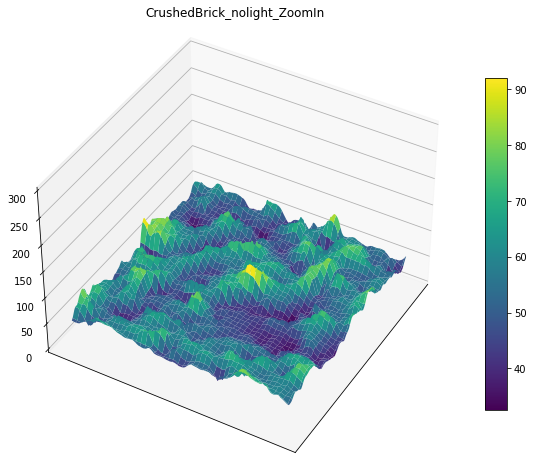

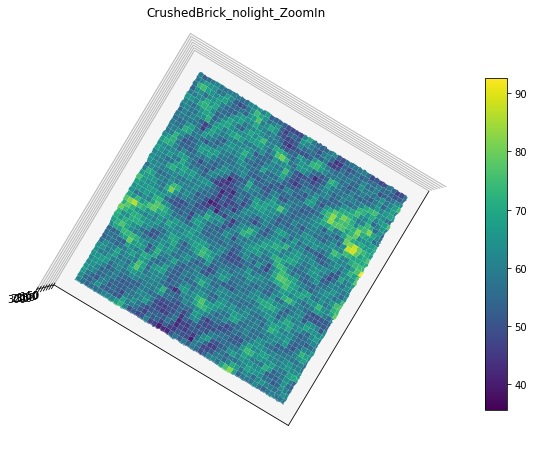

In [102]:
draw_surface('CrushedBrick_light',Gray_CrushedBrick_light,70,(0,300),40,30)
draw_surface('CrushedBrick_light',Gray_CrushedBrick_light,3000,(0,300),90,30)

draw_surface('CrushedBrick_light_ZoomIn',Gray_CrushedBrick_light_ZoomIn,70,(0,300),40,30)
draw_surface('CrushedBrick_light_ZoomIn',Gray_CrushedBrick_light_ZoomIn,3000,(0,300),90,30)

draw_surface('CrushedBrick_nolight',Gray_CrushedBrick_nolight,30,(0,300),40,45)
draw_surface('CrushedBrick_nolight',Gray_CrushedBrick_nolight,3000,(0,300),90,30)

draw_surface('CrushedBrick_nolight_ZoomIn',Gray_CrushedBrick_nolight_ZoomIn,70,(0,300),40,30)
draw_surface('CrushedBrick_nolight_ZoomIn',Gray_CrushedBrick_nolight_ZoomIn,3000,(0,300),90,30)

## Extract One Row of Data Image

----------------------------------------
CrushedBrick_light
min -->  0.0326797385620915
max -->  0.8104575163398693
----------------------------------------


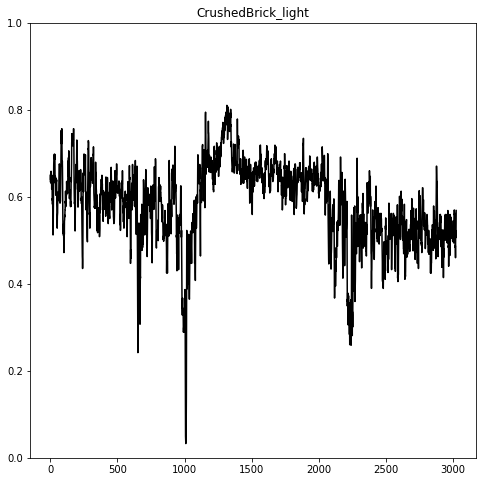

In [103]:
extract_CrushedBrick_light = extract_one_rowOf_DataImage('CrushedBrick_light',Gray_CrushedBrick_light)

----------------------------------------
CrushedBrick_light_ZoomIn
min -->  0.013071895424836602
max -->  0.722875816993464
----------------------------------------


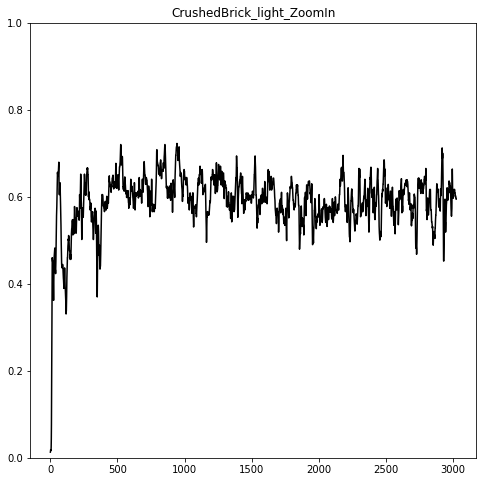

In [104]:
extract_CrushedBrick_light_ZoomIn = extract_one_rowOf_DataImage('CrushedBrick_light_ZoomIn',Gray_CrushedBrick_light_ZoomIn)

----------------------------------------
CrushedBrick_nolight
min -->  0.044444444444444446
max -->  0.9816993464052287
----------------------------------------


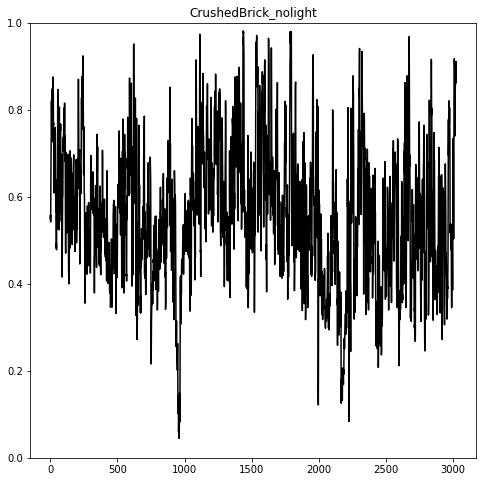

In [105]:
extract_CrushedBrick_nolight = extract_one_rowOf_DataImage('CrushedBrick_nolight',Gray_CrushedBrick_nolight)

----------------------------------------
CrushedBrick_nolight_ZoomIn
min -->  0.01045751633986928
max -->  0.9934640522875816
----------------------------------------


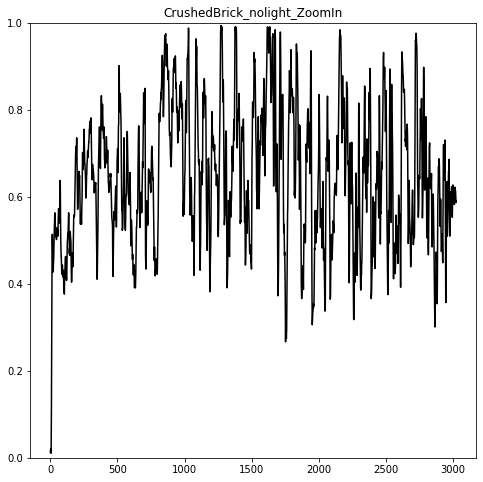

In [106]:
extract_CrushedBrick_nolight_ZoomIn = extract_one_rowOf_DataImage('CrushedBrick_nolight_ZoomIn',Gray_CrushedBrick_nolight_ZoomIn)

## Pass through High & Low Frequency Pass Filter

----------------------------------------
CrushedBrick_light
min -->  0.0326797385620915
max -->  0.8104575163398693
----------------------------------------
----------------------------------------
HPF_CrushedBrick_light
min -->  -0.29865505350261123
max -->  0.1924642680896902
----------------------------------------
----------------------------------------
LPF_CrushedBrick_light
min -->  0.3294521920827271
max -->  0.7743093113299304
----------------------------------------


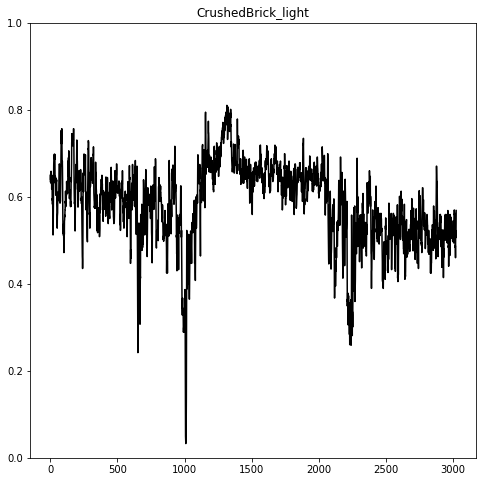

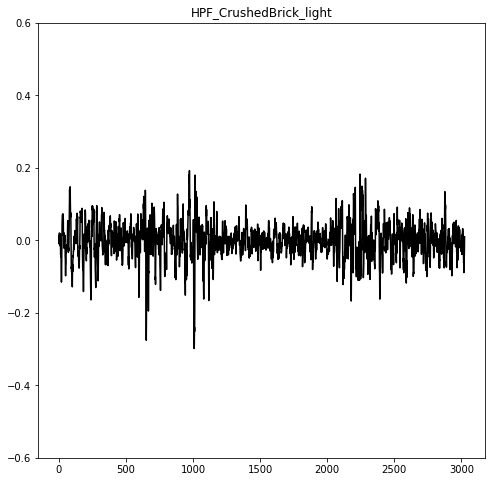

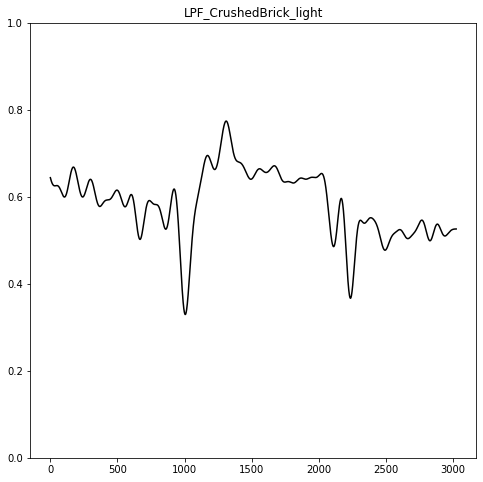

In [107]:
extract_one_rowOf_DataImage('CrushedBrick_light',Gray_CrushedBrick_light)
HPF_CrushedBrick_light = butter_highpass_filter(extract_CrushedBrick_light,1,100)
draw_frequency('high','HPF_CrushedBrick_light',filtered_frequency=HPF_CrushedBrick_light)
LPF_CrushedBrick_light = butter_lowpass_filter(extract_CrushedBrick_light,1,100)
draw_frequency('low','LPF_CrushedBrick_light',filtered_frequency=LPF_CrushedBrick_light)

----------------------------------------
CrushedBrick_light_ZoomIn
min -->  0.013071895424836602
max -->  0.722875816993464
----------------------------------------
----------------------------------------
HPF_CrushedBrick_light_ZoomIn
min -->  -0.14143219772386634
max -->  0.2223409408170804
----------------------------------------
----------------------------------------
LPF_CrushedBrick_light_ZoomIn
min -->  -0.004406847655130251
max -->  0.6825988796685274
----------------------------------------


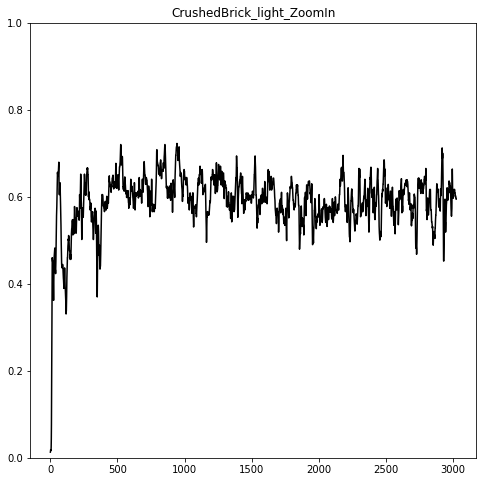

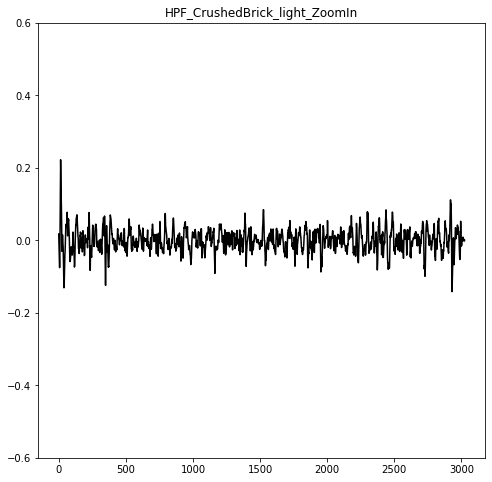

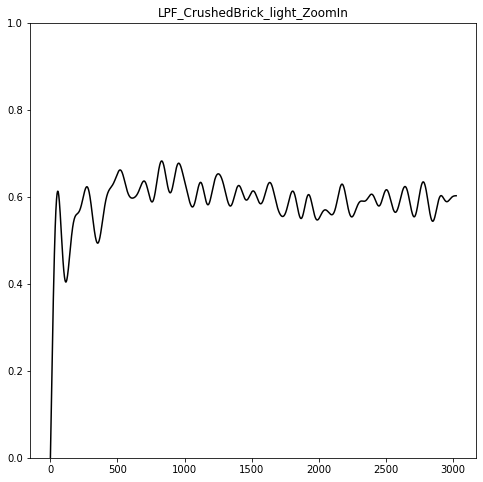

In [108]:
extract_one_rowOf_DataImage('CrushedBrick_light_ZoomIn',Gray_CrushedBrick_light_ZoomIn)
HPF_CrushedBrick_light_ZoomIn = butter_highpass_filter(extract_CrushedBrick_light_ZoomIn,1,100)
draw_frequency('high','HPF_CrushedBrick_light_ZoomIn',filtered_frequency=HPF_CrushedBrick_light_ZoomIn)
LPF_CrushedBrick_light_ZoomIn = butter_lowpass_filter(extract_CrushedBrick_light_ZoomIn,1,100)
draw_frequency('low','LPF_CrushedBrick_light_ZoomIn',filtered_frequency=LPF_CrushedBrick_light_ZoomIn)

----------------------------------------
CrushedBrick_nolight
min -->  0.044444444444444446
max -->  0.9816993464052287
----------------------------------------
----------------------------------------
HPF_CrushedBrick_nolight
min -->  -0.40508418561921183
max -->  0.3724225146035597
----------------------------------------
----------------------------------------
LPF_CrushedBrick_nolight
min -->  0.2449922936494429
max -->  0.7620264921613017
----------------------------------------


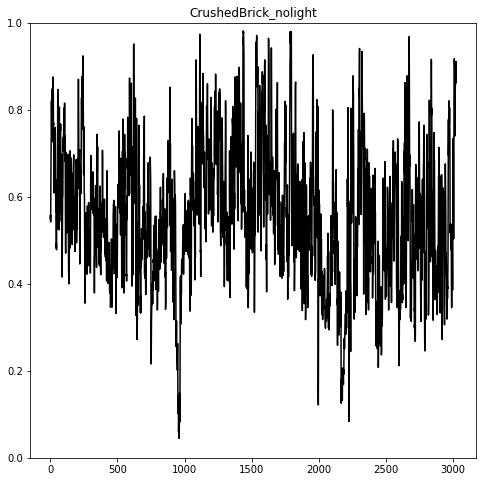

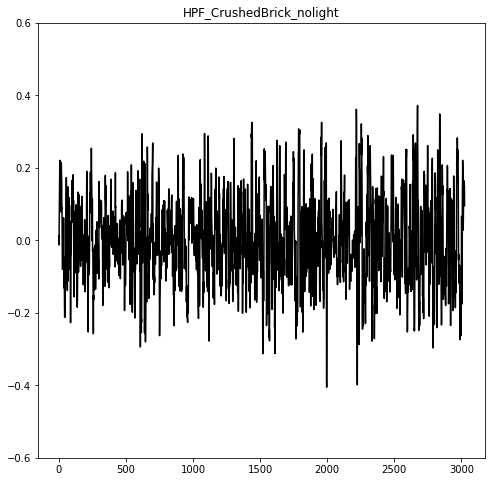

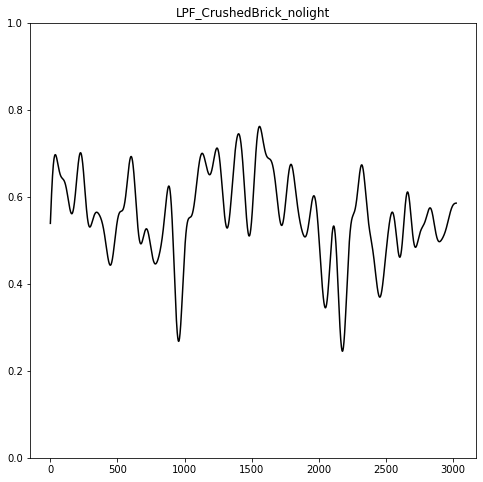

In [109]:
extract_one_rowOf_DataImage('CrushedBrick_nolight',Gray_CrushedBrick_nolight)
HPF_CrushedBrick_nolight = butter_highpass_filter(extract_CrushedBrick_nolight,1,100)
draw_frequency('high','HPF_CrushedBrick_nolight',filtered_frequency=HPF_CrushedBrick_nolight)
LPF_CrushedBrick_nolight = butter_lowpass_filter(extract_CrushedBrick_nolight,1,100)
draw_frequency('low','LPF_CrushedBrick_nolight',filtered_frequency=LPF_CrushedBrick_nolight)

----------------------------------------
CrushedBrick_nolight_ZoomIn
min -->  0.01045751633986928
max -->  0.9934640522875816
----------------------------------------
----------------------------------------
HPF_CrushedBrick_nolight_ZoomIn
min -->  -0.33837119500894247
max -->  0.32161173495773443
----------------------------------------
----------------------------------------
LPF_CrushedBrick_nolight_ZoomIn
min -->  0.01239355863063
max -->  0.9229869476981107
----------------------------------------


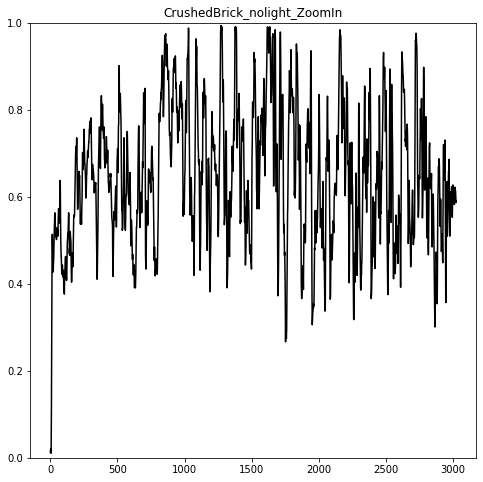

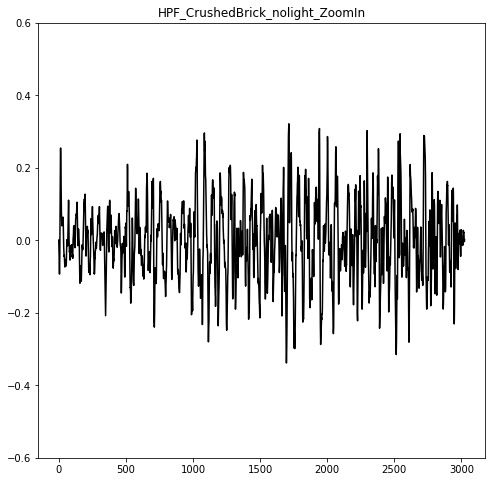

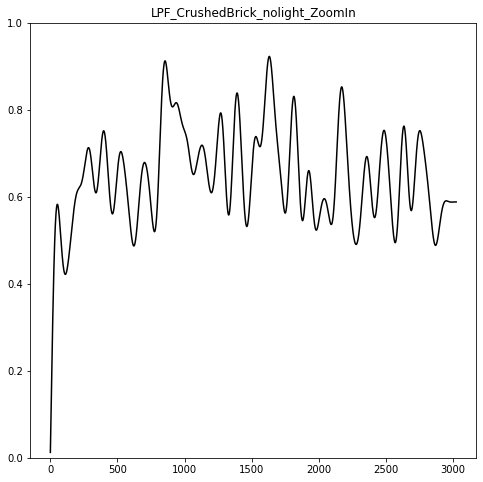

In [110]:
extract_one_rowOf_DataImage('CrushedBrick_nolight_ZoomIn',Gray_CrushedBrick_nolight_ZoomIn)
HPF_CrushedBrick_nolight_ZoomIn = butter_highpass_filter(extract_CrushedBrick_nolight_ZoomIn,1,100)
draw_frequency('high','HPF_CrushedBrick_nolight_ZoomIn',filtered_frequency=HPF_CrushedBrick_nolight_ZoomIn)
LPF_CrushedBrick_nolight_ZoomIn = butter_lowpass_filter(extract_CrushedBrick_nolight_ZoomIn,1,100)
draw_frequency('low','LPF_CrushedBrick_nolight_ZoomIn',filtered_frequency=LPF_CrushedBrick_nolight_ZoomIn)

## Evaluate All Crushed Brick Images

## Evaluate with Ra

In [111]:
print('CrushedBrick_light --> ',compute_Ra(HPF_CrushedBrick_light))
print('CrushedBrick_light_ZoomIn --> ',compute_Ra(HPF_CrushedBrick_light_ZoomIn))
print('CrushedBrick_nolight --> ',compute_Ra(HPF_CrushedBrick_nolight))
print('CrushedBrick_nolight_ZoomIn --> ',compute_Ra(HPF_CrushedBrick_nolight_ZoomIn))

CrushedBrick_light -->  0.035060506250138616
CrushedBrick_light_ZoomIn -->  0.022977546594061087
CrushedBrick_nolight -->  0.09148571448934262
CrushedBrick_nolight_ZoomIn -->  0.0835816373275687


## Evaluate with Rz1max

In [112]:
print('CrushedBrick_light --> ',compute_Rz1max(HPF_CrushedBrick_light))
print('CrushedBrick_light_ZoomIn --> ',compute_Rz1max(HPF_CrushedBrick_light_ZoomIn))
print('CrushedBrick_nolight --> ',compute_Rz1max(HPF_CrushedBrick_nolight))
print('CrushedBrick_nolight_ZoomIn --> ',compute_Rz1max(HPF_CrushedBrick_nolight_ZoomIn))

CrushedBrick_light -->  0.4911193215923014
CrushedBrick_light_ZoomIn -->  0.3637731385409467
CrushedBrick_nolight -->  0.7775067002227716
CrushedBrick_nolight_ZoomIn -->  0.6599829299666768


## Evaluate with Rz

In [113]:
print('CrushedBrick_light --> ',compute_Rz(HPF_CrushedBrick_light))
print('CrushedBrick_light_ZoomIn --> ',compute_Rz(HPF_CrushedBrick_light_ZoomIn))
print('CrushedBrick_nolight --> ',compute_Rz(HPF_CrushedBrick_nolight))
print('CrushedBrick_nolight_ZoomIn --> ',compute_Rz(HPF_CrushedBrick_nolight_ZoomIn))

CrushedBrick_light -->  0.3172341279122931
CrushedBrick_light_ZoomIn -->  0.21885138280704908
CrushedBrick_nolight -->  0.6351436530190265
CrushedBrick_nolight_ZoomIn -->  0.5808480471941861
